In [74]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from IPython.display import Image
from skimage.transform import resize
from skimage.io import imread
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Preparing Data

In [3]:
#import data from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pathlib
path = "drive/MyDrive/344-331 Data Science/Dataset for mini-project/Chessman-image-dataset/Chess/"
data_dir = pathlib.Path(path)

In [5]:
#นับจำนวนรูปภาพที่จะใช้ Train
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

465


In [6]:
# แสดงรายการไฟล์ที่นำเข้าได้
file_list = os.listdir(path)
print("รายการไฟล์ทั้งหมดในโฟลเดอร์:")
for file_name in file_list:
    print(file_name)

รายการไฟล์ทั้งหมดในโฟลเดอร์:
Pawn
Rook
Queen
Bishop
Knight
King


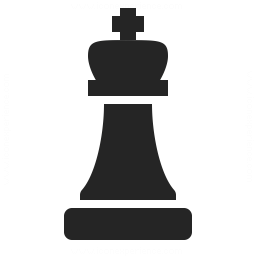

In [7]:
#แสดงตัวอย่างรูปภาพ
King = list(data_dir.glob('King/*'))
PIL.Image.open(str(King[1]))

สกัดคุณลักษณะข้อมูล

In [ ]:
import os
import matplotlib.pyplot as plt
from skimage import color, feature, io

# ตำแหน่งโฟลเดอร์ที่มีข้อมูลภาพ
base_dir = '/content/drive/MyDrive/344-331 Data Science/Dataset for mini-project/Chessman-image-dataset/Chess/'

# รายชื่อ class
class_names = ['Bishop', 'King', 'Knight', 'Pawn', 'Queen', 'Rook']

# จำนวนภาพที่ต้องการแสดงต่อแต่ละ class
num_images_per_class = 4

# สร้าง subplot
fig, axs = plt.subplots(len(class_names), num_images_per_class, figsize=(20, 4*len(class_names)))

# วนลูปผ่านแต่ละ class
for i, class_name in enumerate(class_names):
    class_path = os.path.join(base_dir, class_name)
    # รายการของภาพในแต่ละ class
    images_in_class = os.listdir(class_path)[:num_images_per_class]
    for j, image_name in enumerate(images_in_class):
        image_path = os.path.join(class_path, image_name)
        # อ่านภาพ
        image = io.imread(image_path)
        # แปลงภาพเป็น grayscale
        image_gray = color.rgb2gray(image)
        # สกัดคุณลักษณะ HOG
        hog_feature = feature.hog(image_gray, block_norm='L2-Hys', pixels_per_cell=(16, 16))
        # แสดงภาพ
        axs[i, j].imshow(image)
        axs[i, j].set_title(class_name)
        axs[i, j].axis('off')
        # แสดงคุณลักษณะ HOG ด้านล่างของภาพ
        axs[i, j].text(0, -20, f'HOG: {hog_feature}', fontsize=10, color='black', ha='left', va='center')

plt.tight_layout()
plt.show()


In [ ]:
import os
import numpy as np
from skimage import io, color, feature
from skimage.transform import resize


# Define parameters
base_dir = "/content/drive/MyDrive/344-331 Data Science/Dataset for mini-project/Chessman-image-dataset/Chess/"
class_names = ['Bishop', 'King', 'Knight', 'Pawn', 'Queen', 'Rook']
num_images_per_class = 30  # Number of images per class
target_size = (150, 150)  # Target image size for resizing

# Create empty lists for features
features = []

# Create empty list for labels
labels = []

# Extract features and generate labels
for i, class_name in enumerate(class_names):
    class_path = os.path.join(base_dir, class_name)
    images_in_class = os.listdir(class_path)[:num_images_per_class]  # Limit to num_images_per_class

    for j, image_name in enumerate(images_in_class):
        image_path = os.path.join(class_path, image_name)

        try:
            # Load and grayscale the image (assuming all images are RGB)
            im = io.imread(image_path)
            image_gray = color.rgb2gray(im)

            # Resize the grayscale image to the target size
            resized_image = resize(image_gray, target_size, preserve_range=True)

            # Extract HOG features from the resized image
            hog_feature = feature.hog(resized_image, block_norm='L2-Hys', pixels_per_cell=(16, 16))

            features.append(hog_feature)
            labels.append(i)

        except Exception as e:
            # Handle any error during processing (e.g., log the image name)
            print(f"Error processing image {image_name}: {str(e)}")

# Convert lists to NumPy arrays (assuming successful feature extraction for all images)
X = np.array(features)
y = np.array(labels)

print("Features shape:", X.shape)
print("Labels shape:", y.shape)

# Model Selection


In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=50)

In [85]:
#Model KNN
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit((X_train), (y_train))

KNeighborsClassifier()

In [46]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(X_test)
print("%.2f" % (accuracy_score(y_pred, y_test)*100))

63.89


In [82]:
#Model SVM
from sklearn import svm

#Create a svm Classifier เลือก kerel ที่เหมาะสมกับที่สุด
model_svm = svm.SVC(kernel='linear') # Linear kernel
model_svm = svm.SVC(probability=True)
#Train the model using the training sets
model_svm.fit(X_train, y_train)

SVC(probability=True)

In [56]:
y_pred = model.predict(X_test)
print("%.2f" % (accuracy_score(y_pred, y_test)*100))

41.67


# Model Evaluation

In [73]:
# Testing the model using the testing data
y_pred = model_knn.predict(X_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy of the model
print(f"This model is {accuracy*100}% accurate")

This model is 38.88888888888889% accurate


In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

      Bishop       0.38      0.50      0.43         6
        King       0.40      0.57      0.47         7
      Knight       0.75      0.60      0.67         5
        Pawn       0.17      0.25      0.20         4
       Queen       0.40      0.22      0.29         9
        Rook       0.33      0.20      0.25         5

    accuracy                           0.39        36
   macro avg       0.40      0.39      0.38        36
weighted avg       0.41      0.39      0.38        36



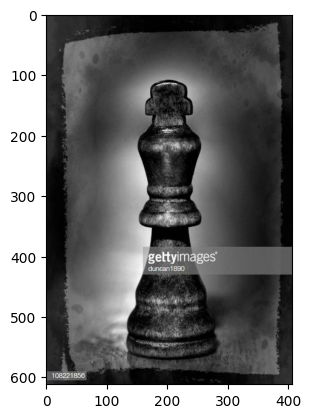

Bishop = 0.00%
King = 60.00%
Knight = 20.00%
Pawn = 20.00%
Queen = 0.00%
Rook = 0.00%


ValueError: X has 67500 features, but KNeighborsClassifier is expecting 3969 features as input.

In [98]:
path = os.path.join('/content/drive/MyDrive/344-331 Data Science/Dataset for mini-project/Chessman-image-dataset/Chess/King/00000003.jpg')
img=imread(path)
plt.imshow(img)
plt.show()
img_resize = resize(img, (150, 150))
l=[img_resize.flatten()]
probabilities = model_knn.predict_proba(X_test)
for ind, val in enumerate(class_names):
    print(f'{val} = {probabilities[0][ind]*100:.2f}%')

predicted_class_index = model_knn.predict(l)[0]
predicted_class_name = class_names[predicted_class_index]
print("The predicted image is : " + predicted_class_name)

โมเดล KNN ข้างต้นเป็นการฝึกอบรมล่วงหน้าเพื่อแยกรูปตัวหมากรุกจากรูปภาพ โดยเเบ่งเป็น 6 class และทำการ Predicted ว่าอยู่ใน class ใด จากรูปข้างต้น จัดอยู่ใน class : King มีความแม่นยำประมาณ 60%

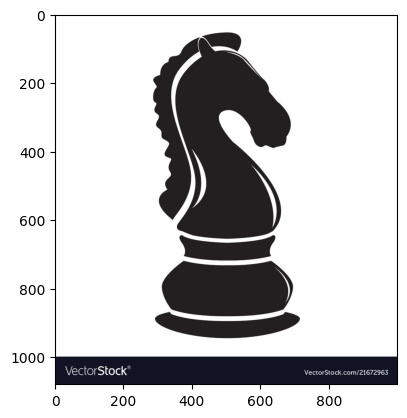

Bishop = 0.00%
King = 60.00%
Knight = 20.00%
Pawn = 20.00%
Queen = 0.00%
Rook = 0.00%


ValueError: X has 67500 features, but KNeighborsClassifier is expecting 3969 features as input.

In [107]:
path = os.path.join('/content/drive/MyDrive/344-331 Data Science/Dataset for mini-project/Chessman-image-dataset/Chess/Knight/00000006.jpg')
img=imread(path)
plt.imshow(img)
plt.show()
img_resize = resize(img, (150, 150))
l=[img_resize.flatten()]
probabilities = model_knn.predict_proba(X_test)
for ind, val in enumerate(class_names):
    print(f'{val} = {probabilities[0][ind]*100:.2f}%')

predicted_class_index = model_knn.predict(l)[0]
predicted_class_name = class_names[predicted_class_index]
print("The predicted image is : " + predicted_class_name)

โมเดล KNN ข้างต้นเป็นการฝึกอบรมล่วงหน้าเพื่อแยกรูปตัวหมากรุกจากรูปภาพ โดยเเบ่งเป็น 6 class และทำการ Predicted ว่าอยู่ใน class ใด จากรูปข้างต้น จัดอยู่ใน class : Kinght มีความแม่นยำประมาณ 20%

<ipython-input-108-ef79150d664b>:16: UserWarning: Glyph 3642 (\N{THAI CHARACTER PHINTHU}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3642 (\N{THAI CHARACTER PHINTHU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


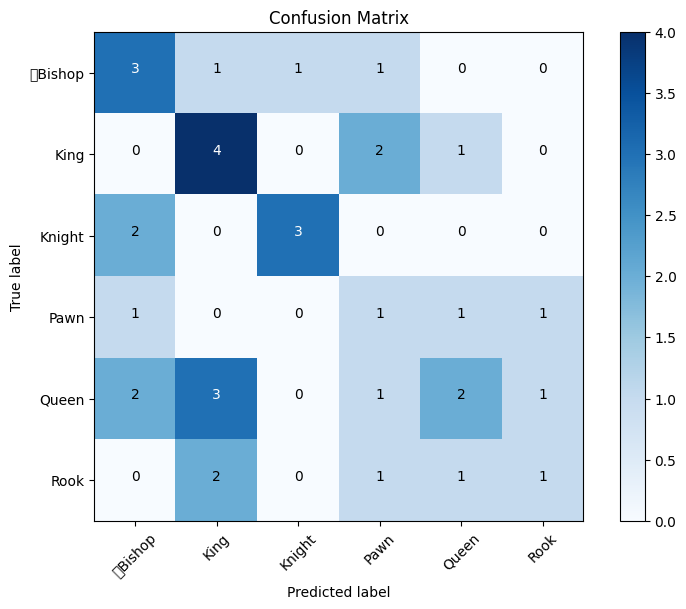


Model Evaluation:
Accuracy: 0.3888888888888889

Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.50      0.43         6
           1       0.40      0.57      0.47         7
           2       0.75      0.60      0.67         5
           3       0.17      0.25      0.20         4
           4       0.40      0.22      0.29         9
           5       0.33      0.20      0.25         5

    accuracy                           0.39        36
   macro avg       0.40      0.39      0.38        36
weighted avg       0.41      0.39      0.38        36



In [108]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

conf_matrix = confusion_matrix(y_test, y_pred)

labels = ['ฺBishop', 'King', 'Knight', 'Pawn', 'Queen', 'Rook']

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.show()

print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Deploy Model

In [109]:
import pickle

# บันทึกโมเดล
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

# โหลดโมเดล
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


In [119]:
import PIL
from PIL import Image

# Load the sample image
King = list(data_dir.glob('King/*'))
img = Image.open(str(King[1]))

# Resize the image (if necessary)
# img = img.resize((150, 150))

# Convert the image to numpy array
img_array = np.array(img)

# Reshape and preprocess the image array
img_array = img_array.reshape(150, 150)

# Predict the label of the test data
predicted_label = loaded_model.predict(img_array)

# Map the predicted label to text
label_mapping = {0: 'Bishop', 1: 'King', 2: 'Knight', 3: 'Pawn', 4: 'Queen', 5: 'Rook'}
predicted_label_pic = label_mapping[predicted_label[0]]

print("Predicted Label:", predicted_label_pic)

ValueError: cannot reshape array of size 196608 into shape (150,150)